# Acquisition of the raw ultrasound image 

Taking advantage of a Vref/2 offset at the ADC level

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import scipy.signal.signaltools as sigtool
from scipy.interpolate import griddata
import math

In [79]:
def CreateSeries(File,FreqRef):

    with open(File) as f:
        content = f.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
    V = [x.strip().split("\t")[1] for x in content] 
    V = np.array(V).astype(np.int)
    t = [x.strip().split("\t")[0] for x in content]
    t = np.array(t).astype(np.float)/FreqRef
    MaxT = t[-1]*FreqRef

    return t,V,MaxT


ADC2_GPIO = [20,26,16,19,13,12, 7, 8,11]
ADC2len = len(ADC2_GPIO)


def GetV2(Volts):
    Signal = []
    GP = []
    Clock = []
    Map = np.zeros((len(V),ADC2len), dtype=np.int)
    for i in range(len(Volts)):
        val = V[i]
        SignalZero = 0
        for k in range(ADC2len):
            Map[i][k] = (val & 2**k)/2**k
        for k in range(ADC2len):
            SignalZero += 2**k*((val & 2**ADC2_GPIO[k])/2**ADC2_GPIO[k])
        Signal.append(SignalZero)
        Clock.append(1*((val & 2**21)/2**21))
        GP.append( 1*((val & 2**6)/2**6) )
    return Signal,Map,GP,Clock

In [80]:
t,V,MaxT = CreateSeries("probe.data",10000000)
print MaxT
print len(V)

9401820.0
100000


In [83]:
M = GetV2(V)[0]
GP = GetV2(V)[2]
CLK = GetV2(V)[3]
plt.plot(M[0:15000],"b")

plt.show()
# 5000 x 20

TypeError: unsupported operand type(s) for /: 'list' and 'float'

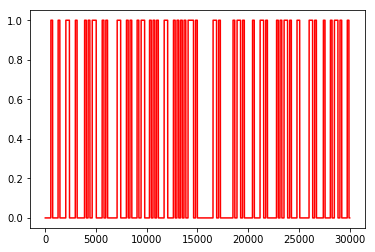

In [85]:
plt.plot(CLK[15000:45000],"r")
plt.show()